<a href="https://colab.research.google.com/github/earth516/WS_AI/blob/main/K_Means_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81_(%EC%98%88%EC%A0%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 예시 데이터 생성
data_points = np.array([
    [1, 2], [1.5, 1.8], [5, 8],
    [8, 8], [1, 0.6], [9, 11],
    [8, 2], [10, 2], [9, 3]
])

# 데이터프레임으로 변환
df = pd.DataFrame(data_points, columns=['X', 'Y'])

df

,X,Y
0,1.0,2.0
1,1.5,1.8
2,5.0,8.0
3,8.0,8.0
4,1.0,0.6
5,9.0,11.0
6,8.0,2.0
7,10.0,2.0
8,9.0,3.0


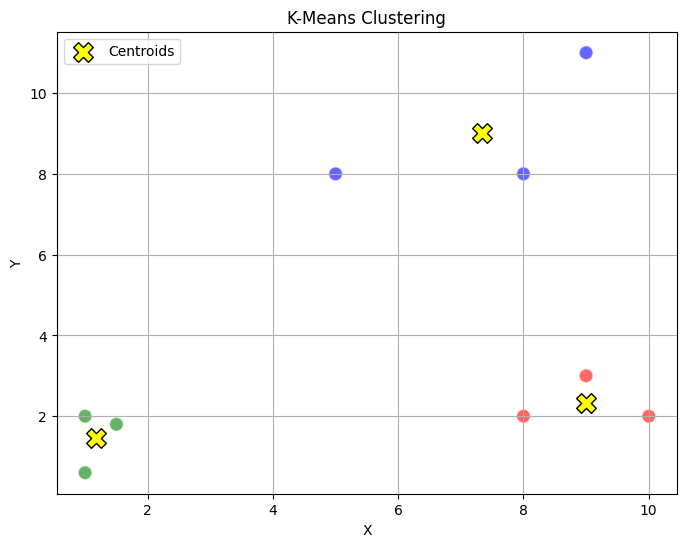

In [ ]:
# K-Means 모델 생성 (클러스터 개수: 3)
kmeans = KMeans(n_clusters=3, random_state=42)

# 모델 학습 및 예측
df['Cluster'] = kmeans.fit_predict(data_points)

# 클러스터 색상 설정
colors = ['r', 'g', 'b']
df['Color'] = df['Cluster'].apply(lambda x: colors[x])

# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(df['X'], df['Y'], c=df['Color'], s=100, alpha=0.6, edgecolors='w')

# 클러스터 중심 표시
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='yellow', s=200, marker='X', edgecolors='k', label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


WCSS: [222.76000000000002, 111.815, 18.646666666666665, 8.48, 7.311666666666667, 2.8116666666666665, 1.145, 0.14500000000000005, 0.0]


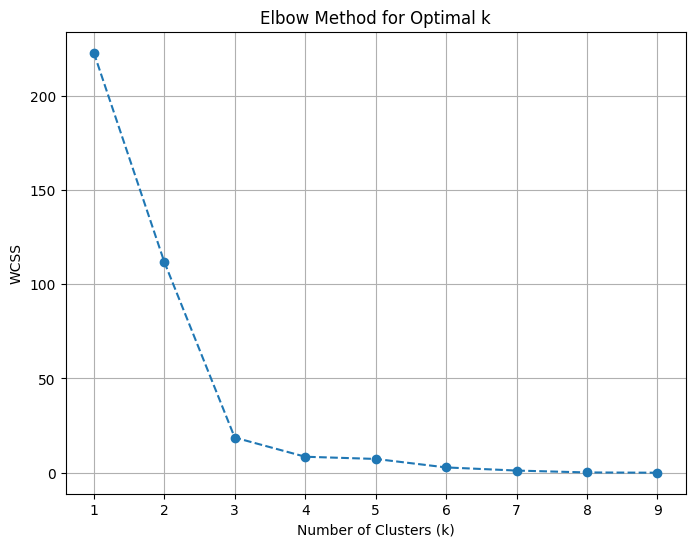

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 데이터 생성 (2차원 데이터)
data_points = np.array([
    [1, 2], [1.5, 1.8], [5, 8],
    [8, 8], [1, 0.6], [9, 11],
    [8, 2], [10, 2], [9, 3]
])

# Elbow Method를 위한 WCSS 저장
wcss = []  # Within-Cluster Sum of Squares

# k = 1부터 k까지 클러스터 개수 설정
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_points)
    wcss.append(kmeans.inertia_)  # WCSS 값 저장

# wcss 리스트 출력 (디버깅용)
print("WCSS:", wcss)

# Elbow Plot 시각화
plt.figure(figsize=(8, 6))
plt.plot(range(1,10), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


##실습2 _ 고객 구매,환불 데이터

In [2]:
import pandas as pd
customer_data = pd.read_csv('customer_data.csv')
customer_data.head()

,Customer ID,ItemsBought,ItemsReturned,ZipCode,Product
0,1,45,7,1,2518
1,2,22,7,4,1285
2,3,11,10,9,1178
3,4,42,27,1,1061
4,5,10,3,4,2034


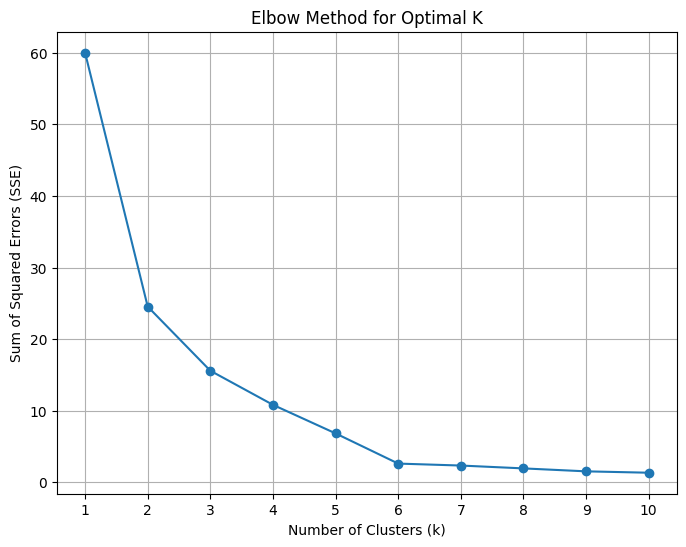

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 클러스터링에 사용할 열 선택
data_for_clustering = customer_data[['ItemsBought', 'ItemsReturned']]

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# 클러스터 개수에 따른 SSE 계산
sse = []
cluster_range = range(1, 11)  # 클러스터 개수를 1부터 10까지 시도
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)  # inertia_는 SSE 값

# 엘보 포인트 시각화
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


클러스터링 작업 실행

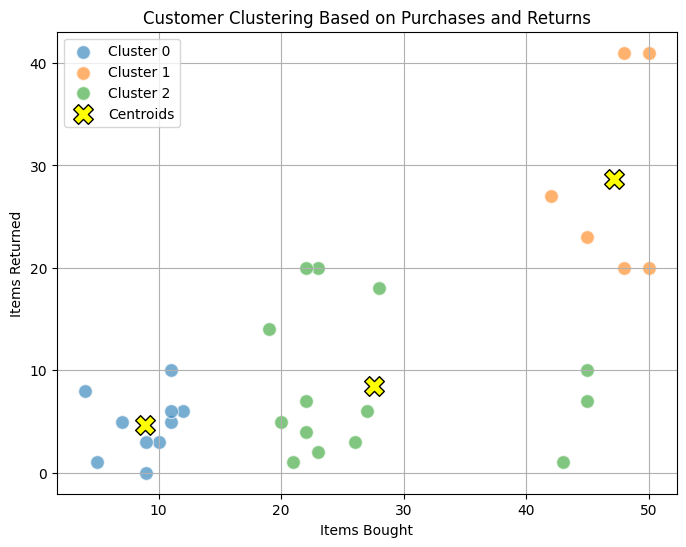

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# CSV 파일 로드
customer_data = pd.read_csv('customer_data.csv')

# 클러스터링에 사용할 열 선택
data_for_clustering = customer_data[['ItemsBought', 'ItemsReturned']]

# 데이터 표준화 (Standardization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# K-Means 클러스터링 적용 (클러스터 개수: 3)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_data)

# 클러스터 레이블을 데이터프레임에 추가
customer_data['Cluster'] = kmeans.labels_

# 클러스터링 결과 시각화
plt.figure(figsize=(8, 6))
for cluster_id in range(3):  # 클러스터 ID별로 반복
    cluster_data = customer_data[customer_data['Cluster'] == cluster_id]
    plt.scatter(cluster_data['ItemsBought'], cluster_data['ItemsReturned'],
                label=f'Cluster {cluster_id}', alpha=0.6, edgecolors='w', s=100)  # 클러스터별 산점도

# 클러스터 중심 표시
centroids = kmeans.cluster_centers_  # 클러스터 중심 좌표
scaled_centroids = scaler.inverse_transform(centroids)  # 원래 스케일로 변환
plt.scatter(scaled_centroids[:, 0], scaled_centroids[:, 1],
            c='yellow', s=200, marker='X', edgecolors='k', label='Centroids')  # 클러스터 중심 시각화

# 그래프 포맷 설정
plt.title('Customer Clustering Based on Purchases and Returns')
plt.xlabel('Items Bought')
plt.ylabel('Items Returned')
plt.legend()
plt.grid(True)
plt.show()

이 클러스터링 결과에서 알 수 있는 점은 무엇일까?

1. 고객 그룹화
Cluster 0 (파란색):

Cluster 1 (주황색):

Cluster 2 (초록색):

2. 비즈니스 전략
Cluster 0:

Cluster 1:

Cluster 2:

3. 군집 중심(Centroids)의 의미

4. 데이터 활용 가능성
